# 1) Waste Management using CNN Model

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


# 2 Importing necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [3]:
# train_path="dataset/TRAIN"
# test_path="dataset/TEST"
import os
train_path = os.path.join("dataset", "TRAIN")
test_path = os.path.join("dataset", "TEST")


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob
from tensorflow.keras.optimizers import Adam

In [6]:
#Visualization
from cv2 import cvtColor
x_data =[]
y_data=[]
for category in glob(train_path + '/*'):
    for file in tqdm(glob(category+'/*')):
        img_array= cv2.imread(file)
        img_array= cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data= pd.DataFrame({'image':x_data, 'label':y_data})

100%|█████████████████████████████████████████████████████████████████████████████| 9999/9999 [00:21<00:00, 473.89it/s]


In [7]:
data.shape

(22564, 2)

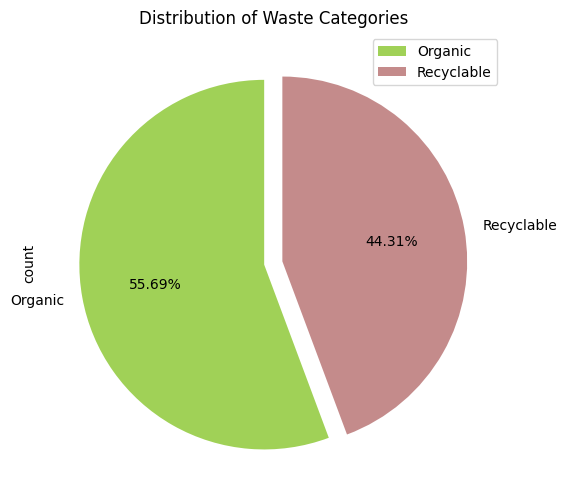

In [8]:
plt.figure(figsize=(6, 6))
colors = ["#a0d157", "#c48b8b"]
data.label.value_counts().plot.pie(
    labels=["Organic", "Recyclable"],
    autopct="%0.2f%%",
    colors=colors,
    startangle=90,
    explode=[0.05, 0.05]
)
plt.title("Distribution of Waste Categories")
plt.legend(loc="best")
plt.show()


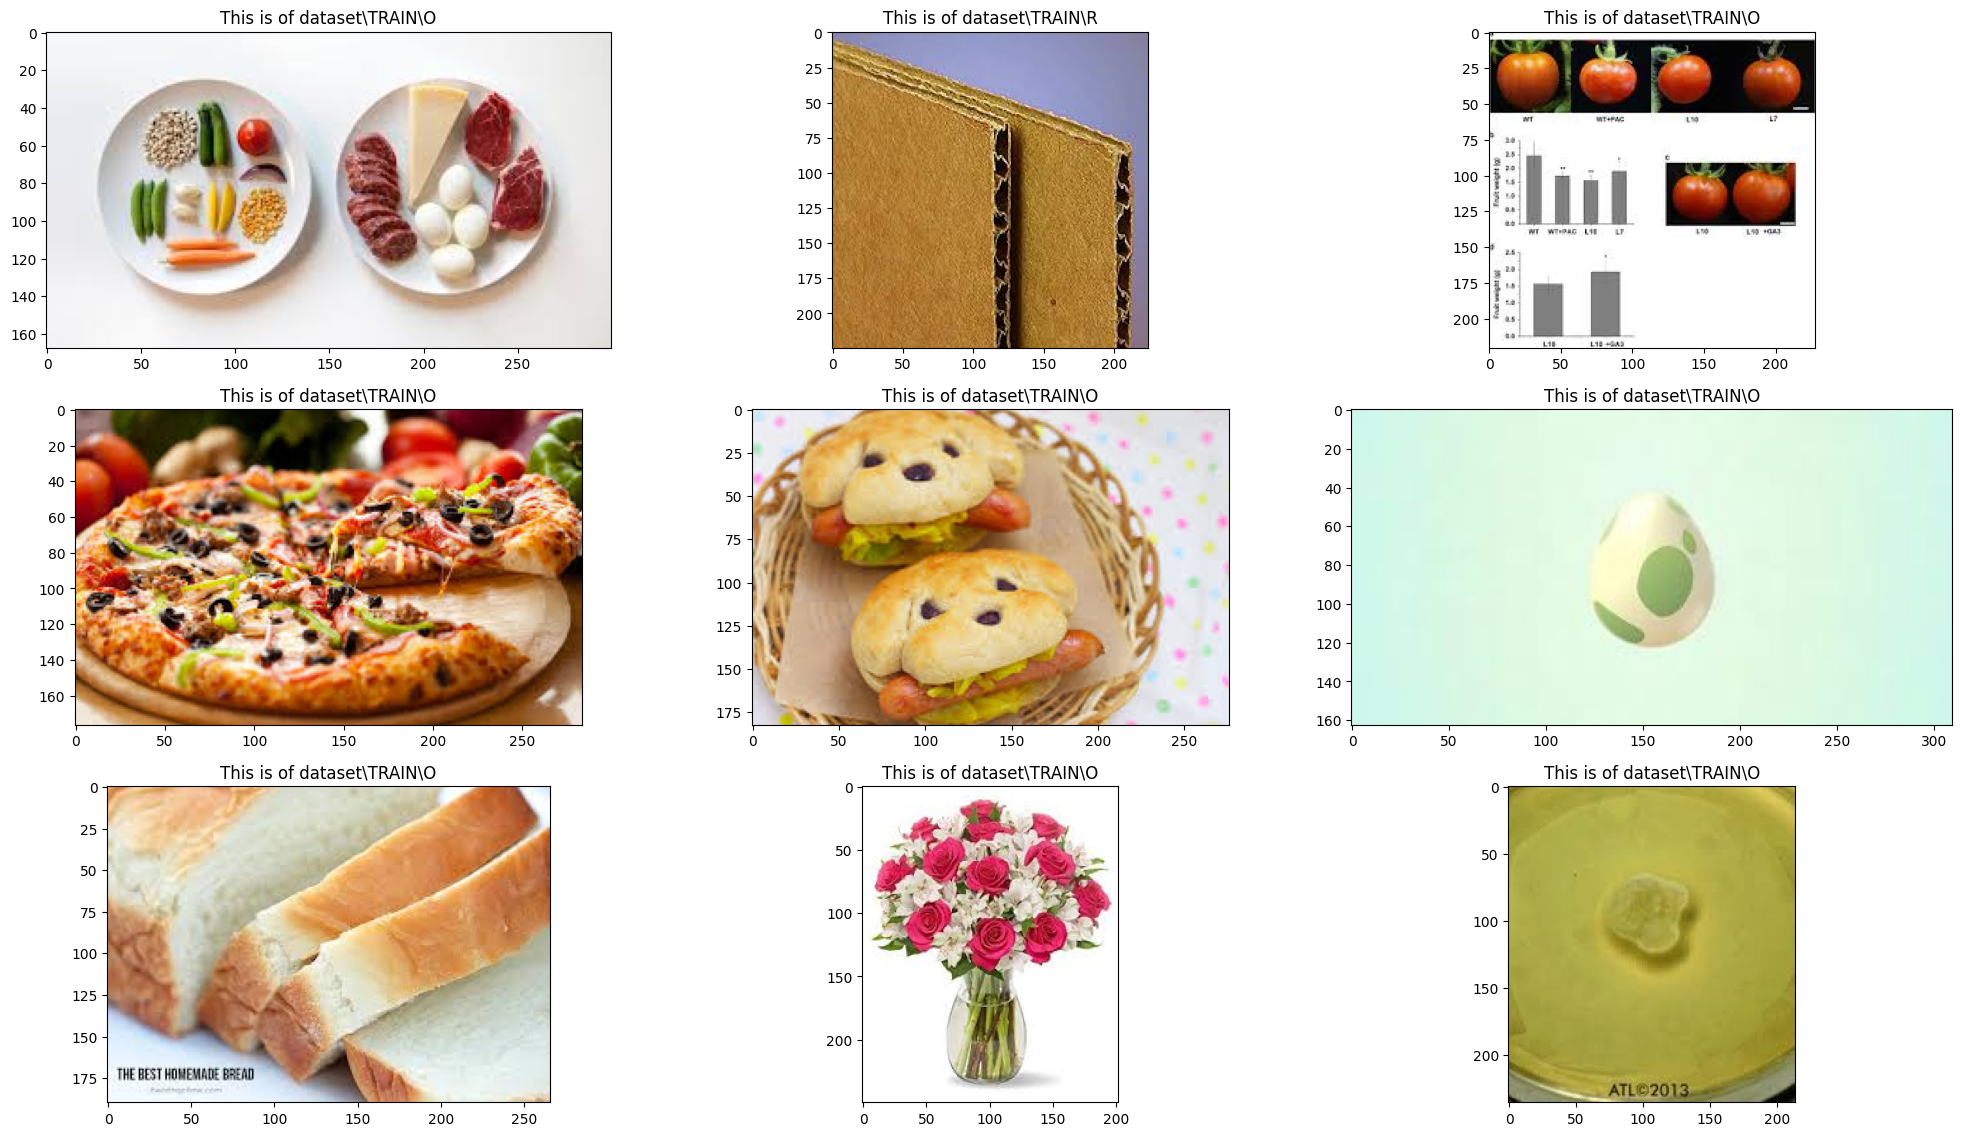

In [9]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index= np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN- Convolutional Neural Networks

In [10]:
model= Sequential()

# Conv Block 1
model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform', input_shape=(224,224,3)))
model.add(BatchNormalization())  
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

# Conv Block 2
model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
model.add(BatchNormalization())  
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

# Conv Block 3
model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
model.add(BatchNormalization())  
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

# Conv Block 4
model.add(Conv2D(256, (3,3), kernel_initializer='he_uniform'))
model.add(BatchNormalization())  
model.add(Activation('relu'))
model.add(MaxPooling2D(2,2))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))  # Increased neuron count
model.add(Dropout(0.5))  # Increased dropout for better regularization

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))  # If more than 2 classes, adjust neurons

# Compile
model.compile(loss="categorical_crossentropy",  
              optimizer=Adam(learning_rate=0.0005),  
              metrics=["accuracy"])
batch_size=256

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 52, 52, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 24, 24, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,874,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 19,331,138 (73.74 MB)

 Trainable params: 19,330,178 (73.74 MB)

 Non-trainable params: 960 (3.75 KB)

In [12]:
# train_datagen= ImageDataGenerator(rescale= 1./255)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2,  
    zoom_range=0.2,  
    horizontal_flip=True,  
    fill_mode="nearest"
)


In [13]:
test_datagen= ImageDataGenerator(rescale= 1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=128,  # Reduce batch size for better memory usage
    class_mode="categorical"
)

test_generator= test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size= batch_size,
    color_mode='rgb',
    class_mode="categorical"
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint("best_model.h5", save_best_only=True)
]

hist = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7056 - loss: 2.7154

177/177 ━━━━━━━━━━━━━━━━━━━━ 1539s 9s/step - accuracy: 0.7059 - loss: 2.7070 - val_accuracy: 0.7222 - val_loss: 0.5068
Epoch 2/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7969 - loss: 0.4763

177/177 ━━━━━━━━━━━━━━━━━━━━ 1462s 8s/step - accuracy: 0.7969 - loss: 0.4763 - val_accuracy: 0.8062 - val_loss: 0.4680
Epoch 3/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 51s/step - accuracy: 0.8004 - loss: 0.4883 

177/177 ━━━━━━━━━━━━━━━━━━━━ 9089s 52s/step - accuracy: 0.8004 - loss: 0.4882 - val_accuracy: 0.7835 - val_loss: 0.4436
Epoch 4/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.8141 - loss: 0.4481

177/177 ━━━━━━━━━━━━━━━━━━━━ 948s 5s/step - accuracy: 0.8141 - loss: 0.4481 - val_accuracy: 0.8082 - val_loss: 0.4127
Epoch 5/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 942s 5s/step - accuracy: 0.8207 - loss: 0.4474 - val_accuracy: 0.8361 - val_loss: 0.4147
Epoch 6/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1141s 6s/step - accuracy: 0.8237 - loss: 0.4324 - val_accuracy: 0.8353 - val_loss: 0.4212
Epoch 7/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.8377 - loss: 0.4095

177/177 ━━━━━━━━━━━━━━━━━━━━ 1457s 8s/step - accuracy: 0.8377 - loss: 0.4095 - val_accuracy: 0.8552 - val_loss: 0.3809
Epoch 8/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 1471s 8s/step - accuracy: 0.8419 - loss: 0.4038 - val_accuracy: 0.8189 - val_loss: 0.4594
Epoch 9/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 2758s 16s/step - accuracy: 0.8430 - loss: 0.3871 - val_accuracy: 0.8532 - val_loss: 0.3896
Epoch 10/10
177/177 ━━━━━━━━━━━━━━━━━━━━ 13582s 77s/step - accuracy: 0.8407 - loss: 0.3879 - val_accuracy: 0.8293 - val_loss: 0.3811


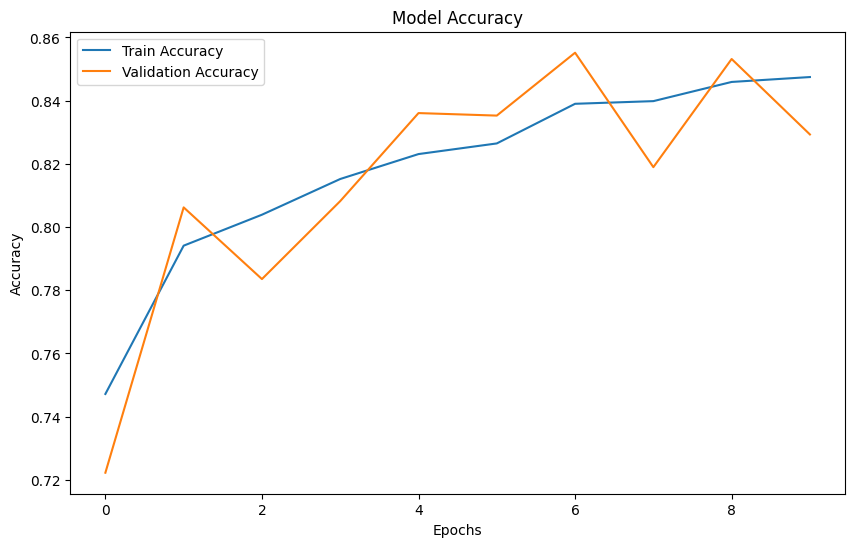

In [16]:
# Plot Accuracy
plt.figure(figsize=(10,6))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

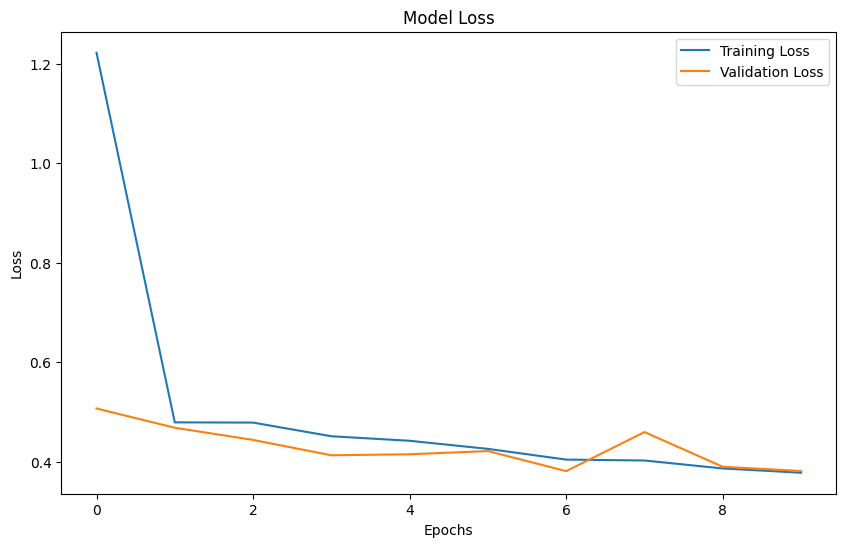

In [17]:
# Plot Loss
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [37]:
# Prediction Function with Fixes and Enhancements

def predict_fun(img):
    """
    Function to preprocess an image and predict its category using a trained model.
    """
    try:
        if img is None:
            raise ValueError("Error: Image not found or could not be loaded. Check the file path.")

        plt.figure(figsize=(6,4))

        # Convert color space
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.tight_layout()

        # Resize and reshape image
        img_resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)
        img_reshaped = np.reshape(img_resized, (1, 224, 224, 3)) / 255.0  # Normalize pixel values

        # Ensure model is defined
        if 'model' not in globals():
            raise ValueError("Model is not loaded. Please load the model before making predictions.")

        # Make prediction
        prediction = model.predict(img_reshaped)
        result = np.argmax(prediction)

        # Display prediction result
        categories = ["Recyclable", "Organic Waste"]
        print(f"The image shown is classified as: {categories[result]}")

    except Exception as e:
        print(f"Error processing the image: {e}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
The image shown is classified as: Organic Waste


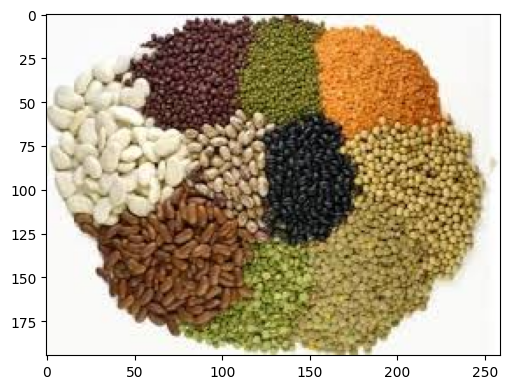

In [36]:
# Test Predictions
image_path = os.path.join(test_path, "O", "O_13235.jpg")  # Example for an image in TEST

if not os.path.exists(image_path):
    print(f"Error: File '{image_path}' does not exist.")
else:
    test_img1 = cv2.imread(image_path, cv2.IMREAD_COLOR)
    predict_fun(test_img1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
The image shown is classified as: Organic Waste


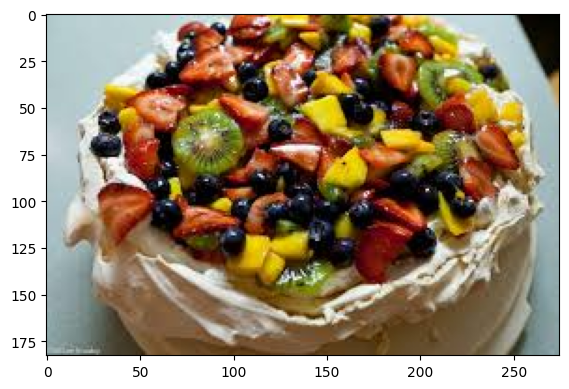

In [35]:
image_path2 = os.path.join(test_path, "O", "O_13926.jpg")  # Example for an image in TEST
if not os.path.exists(image_path2):
    print(f"Error: File '{image_path2}' does not exist.")
else:
    test_img2 = cv2.imread(image_path2, cv2.IMREAD_COLOR)
    predict_fun(test_img2)